# KNN Preprocessing

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np

data = pd.read_csv('bank-additional-full.csv', sep=',', na_values='.')
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [2]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39186,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
39187,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
39188,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
39189,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


<Axes: >

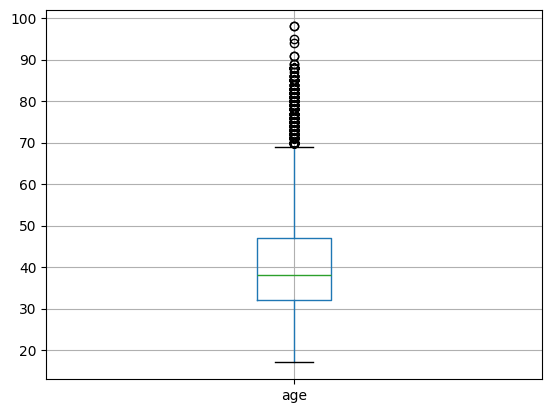

In [3]:
data.boxplot(column=['age'])

1399
[[<Axes: title={'center': 'pdays'}>]]


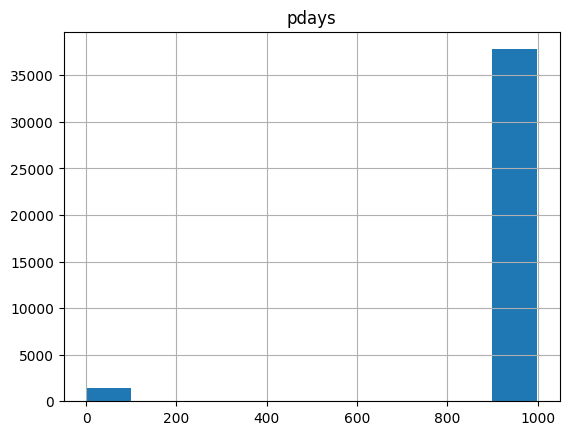

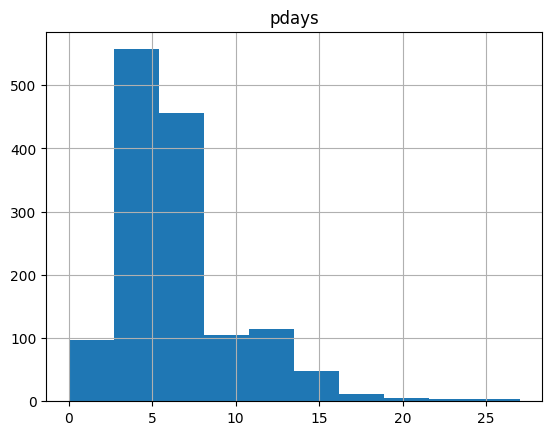

In [4]:
data.hist(column=['pdays'])
print(len(data[data.pdays<100]))
print(data[data.pdays<999].hist(column=['pdays']))

In [5]:
data["was_contacted"] = np.where(data["pdays"] < 100, 1, 0)
print(len(data[data.was_contacted == 1]))

1399


In [6]:
age = data[data.age>data.age.mean()+3*data.age.std()]
print(len(age))
print(age.min())

378
age                     71
job                 admin.
marital           divorced
education         basic.4y
default                 no
housing                 no
loan                    no
contact           cellular
month                  apr
day_of_week            fri
duration                 1
campaign                 1
pdays                    2
previous                 0
poutcome           failure
emp.var.rate          -3.4
cons.price.idx      92.201
cons.conf.idx        -50.8
euribor3m            0.635
nr.employed         4963.6
y                       no
was_contacted            0
dtype: object


In [7]:
data.corr(method='pearson', numeric_only=True)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,was_contacted
age,1.000000,0.001546,0.005474,-0.037743,0.027838,-0.003012,-0.001125,0.127213,0.008171,-0.020498,0.037679
duration,0.001546,1.000000,-0.071362,-0.044164,0.017368,-0.026115,0.006358,-0.008078,-0.030544,-0.042354,0.044217
campaign,0.005474,-0.071362,1.000000,0.051724,-0.078178,0.149993,0.127493,-0.010179,0.134084,0.142450,-0.051714
pdays,-0.037743,-0.044164,0.051724,1.000000,-0.581879,0.268314,0.079847,-0.089746,0.291988,0.367341,-0.999993
previous,0.027838,0.017368,-0.078178,-0.581879,1.000000,-0.419781,-0.207791,-0.057177,-0.451472,-0.496183,0.581820
emp.var.rate,-0.003012,-0.026115,0.149993,0.268314,-0.419781,1.000000,0.775741,0.211027,0.972417,0.907748,-0.268260
cons.price.idx,-0.001125,0.006358,0.127493,0.079847,-0.207791,0.775741,1.000000,0.070075,0.689978,0.524660,-0.079685
cons.conf.idx,0.127213,-0.008078,-0.010179,-0.089746,-0.057177,0.211027,0.070075,1.000000,0.291929,0.114673,0.089663
euribor3m,0.008171,-0.030544,0.134084,0.291988,-0.451472,0.972417,0.689978,0.291929,1.000000,0.945250,-0.292009
nr.employed,-0.020498,-0.042354,0.142450,0.367341,-0.496183,0.907748,0.524660,0.114673,0.945250,1.000000,-0.367416


In [8]:
data.y = pd.Series(np.where(data.y.values == 'yes', 1, 0), data.index)

In [9]:
dummy = pd.get_dummies(data)
dummy.columns
print(dummy.age)

0        56
1        57
2        37
3        40
4        56
         ..
39186    73
39187    46
39188    56
39189    44
39190    74
Name: age, Length: 39191, dtype: int64


In [10]:
print(len(data[data.y == 1]))
print(len(data[data.y == 1]) + len(data[data.y == 0]))

4360
39191


In [11]:
data = dummy
data.corr(method='pearson')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
age,1.000000,0.001546,0.005474,-0.037743,0.027838,-0.003012,-0.001125,0.127213,0.008171,-0.020498,...,0.056898,0.037016,0.006073,0.019852,-0.022563,0.020160,-0.023174,0.000434,-0.019665,0.037275
duration,0.001546,1.000000,-0.071362,-0.044164,0.017368,-0.026115,0.006358,-0.008078,-0.030544,-0.042354,...,0.017637,0.016905,-0.008578,-0.022664,0.013523,0.003409,0.014252,-0.014422,-0.009082,0.042335
campaign,0.005474,-0.071362,1.000000,0.051724,-0.078178,0.149993,0.127493,-0.010179,0.134084,0.142450,...,-0.048711,-0.032806,0.028508,0.014688,0.007132,-0.027626,-0.022675,-0.068367,0.086325,-0.049451
pdays,-0.037743,-0.044164,0.051724,1.000000,-0.581879,0.268314,0.079847,-0.089746,0.291988,0.367341,...,-0.131608,-0.152737,0.011856,0.002195,-0.010312,-0.005809,0.002422,0.007164,0.485789,-0.951531
previous,0.027838,0.017368,-0.078178,-0.581879,1.000000,-0.419781,-0.207791,-0.057177,-0.451472,-0.496183,...,0.125635,0.154076,0.006401,-0.002788,0.002643,-0.001099,-0.005053,0.689546,-0.881297,0.519301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
day_of_week_tue,0.020160,0.003409,-0.027626,-0.005809,-0.001099,0.013908,-0.000949,0.052004,0.022603,0.010626,...,0.003492,0.001603,-0.238580,-0.252183,-0.253889,1.000000,-0.245953,-0.005025,0.001644,0.005455
day_of_week_wed,-0.023174,0.014252,-0.022675,0.002422,-0.005053,0.027183,0.011626,0.022867,0.030889,0.024278,...,-0.003318,0.004170,-0.240644,-0.254366,-0.256086,-0.245953,1.000000,-0.006900,0.006773,-0.001241
poutcome_failure,0.000434,-0.014422,-0.068367,0.007164,0.689546,-0.380395,-0.299268,-0.168897,-0.383383,-0.346288,...,0.054706,0.047651,0.018986,-0.000318,-0.006294,-0.005025,-0.006900,1.000000,-0.856452,-0.062076
poutcome_nonexistent,-0.019665,-0.009082,0.086325,0.485789,-0.881297,0.469630,0.306318,0.106814,0.483712,0.486692,...,-0.110361,-0.119678,-0.010905,0.002438,-0.000175,0.001644,0.006773,-0.856452,1.000000,-0.462066


## Separating data and labels

In [12]:
X = data.drop(['y'], axis=1).values
y = data.y.values.astype(int)

print(X.shape)
print(y.shape)

(39191, 61)
(39191,)


In [13]:
# Notice that only two last features are good to separate data.
# Let's find the 10-fold cross-validation with all columns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import sklearn.neighbors as nb

cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) 

cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X,y=y, cv=cv, scoring='accuracy')
print(cv_scores)
print(np.mean(cv_scores))

[0.9        0.90635366 0.90431232 0.90967083 0.89971932 0.90865017
 0.90278132 0.90073998 0.90303649 0.90660883]
0.9041872926767033


In [14]:
for i in range(20):
    print('std:',X[:,i].std(),'min',X[:,i].min(),'max',X[:,i].max())

std: 10.28816861224553 min 17 max 98
std: 259.7252599689887 min 0 max 4918
std: 2.7720738473606157 min 1 max 56
std: 184.24269151000544 min 0 max 999
std: 0.48825225686711266 min 0 max 7
std: 1.5664821840190177 min -3.4 max 1.4
std: 0.5770423960865926 min 92.201 max 94.767
std: 4.621835748047421 min -50.8 max -26.9
std: 1.730470588844565 min 0.634 max 5.045
std: 71.78682547940478 min 4963.6 max 5228.1
std: 0.18553354814546566 min 0 max 1
std: 0.43820528657815855 min False max True
std: 0.4170776316592573 min False max True
std: 0.1853418693052726 min False max True
std: 0.15883341992318506 min False max True
std: 0.25748174199921087 min False max True
std: 0.19888974015592514 min False max True
std: 0.1847654494015846 min False max True
std: 0.29639065058998115 min False max True
std: 0.13309552840602595 min False max True


In [15]:
# Let's solve that
from sklearn import preprocessing

# One way is to standarize all data mean 0, std 1
scaler = preprocessing.StandardScaler().fit(X)
X2=scaler.transform(X)

In [16]:
# Let's repeat the 10-fold Cross-validation with new data X2
cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X2,y=y, cv=cv, scoring='accuracy')  
print(cv_scores)
np.mean(cv_scores)

[0.89464286 0.89971932 0.90048482 0.8920643  0.89614698 0.89716764
 0.89716764 0.89180913 0.90329166 0.89895381]


np.float64(0.8971448164619253)

In [17]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

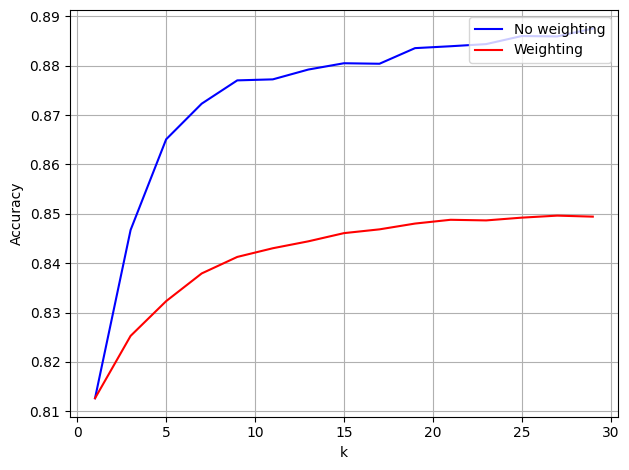

In [18]:
X_new = SelectKBest(mutual_info_classif, k=2).fit_transform(X, y)

lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki), X=X_new, y=y, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'b',label='No weighting')

lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki,weights='distance'), X=X_new, y=y, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'r',label='Weighting')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_new, y)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 29, 'weights': 'uniform'} Accuracy= 0.8974000031244955


/home/kmalhal/.local/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
